In [2]:
library('tidyverse')
ds = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
ds %>% print
df = ds


── Column specification ────────────────────────────────────────────────────────
cols(
  YEAR = col_double(),
  GoogleKnowlege_Occupation = col_character(),
  Show = col_character(),
  Group = col_character(),
  Raw_Guest_List = col_character()
)




# A tibble: 2,693 x 5
    YEAR GoogleKnowlege_Occupation Show    Group    Raw_Guest_List  
   <dbl> <chr>                     <chr>   <chr>    <chr>           
 1  1999 actor                     1/11/99 Acting   Michael J. Fox  
 2  1999 Comedian                  1/12/99 Comedy   Sandra Bernhard 
 3  1999 television actress        1/13/99 Acting   Tracey Ullman   
 4  1999 film actress              1/14/99 Acting   Gillian Anderson
 5  1999 actor                     1/18/99 Acting   David Alan Grier
 6  1999 actor                     1/19/99 Acting   William Baldwin 
 7  1999 Singer-lyricist           1/20/99 Musician Michael Stipe   
 8  1999 model                     1/21/99 Media    Carmen Electra  
 9  1999 actor                     1/25/99 Acting   Matthew Lillard 
10  1999 stand-up comedian         1/26/99 Comedy   David Cross     
# … with 2,683 more rows


**The data consists of The Daily Show's guest list, the guest's occupation and also groups guests' occupation into different categories. For this project, I went further and grouped the categories into two broader ones: Acting, Comedy & Music and Government and Politics.**

In [3]:
ds_group_new = ds %>%
mutate(Group_new = ifelse(Group %in% c("Acting", "Comedy","Musician"), "Acting, Comedy & Music", 
                   ifelse(Group %in% c("Politician", "Political Aide", "Military", "Consultant", "Advocacy"), "Government and Politics", "Other"))) %>% filter(Group_new != "Other") 


ds_group_new %>% head

YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,Group_new
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"
1999,actor,1/19/99,Acting,William Baldwin,"Acting, Comedy & Music"


In [4]:
ds_group_new_percent = ds_group_new %>% group_by(YEAR, Group_new) %>% count %>% group_by(YEAR) %>% mutate(percent = n/sum(n) * 100)
ds_group_new_percent %>% head

YEAR,Group_new,n,percent
<dbl>,<chr>,<int>,<dbl>
1999,"Acting, Comedy & Music",150,98.684211
1999,Government and Politics,2,1.315789
2000,"Acting, Comedy & Music",125,89.285714
2000,Government and Politics,15,10.714286
2001,"Acting, Comedy & Music",114,96.610169
2001,Government and Politics,4,3.389831


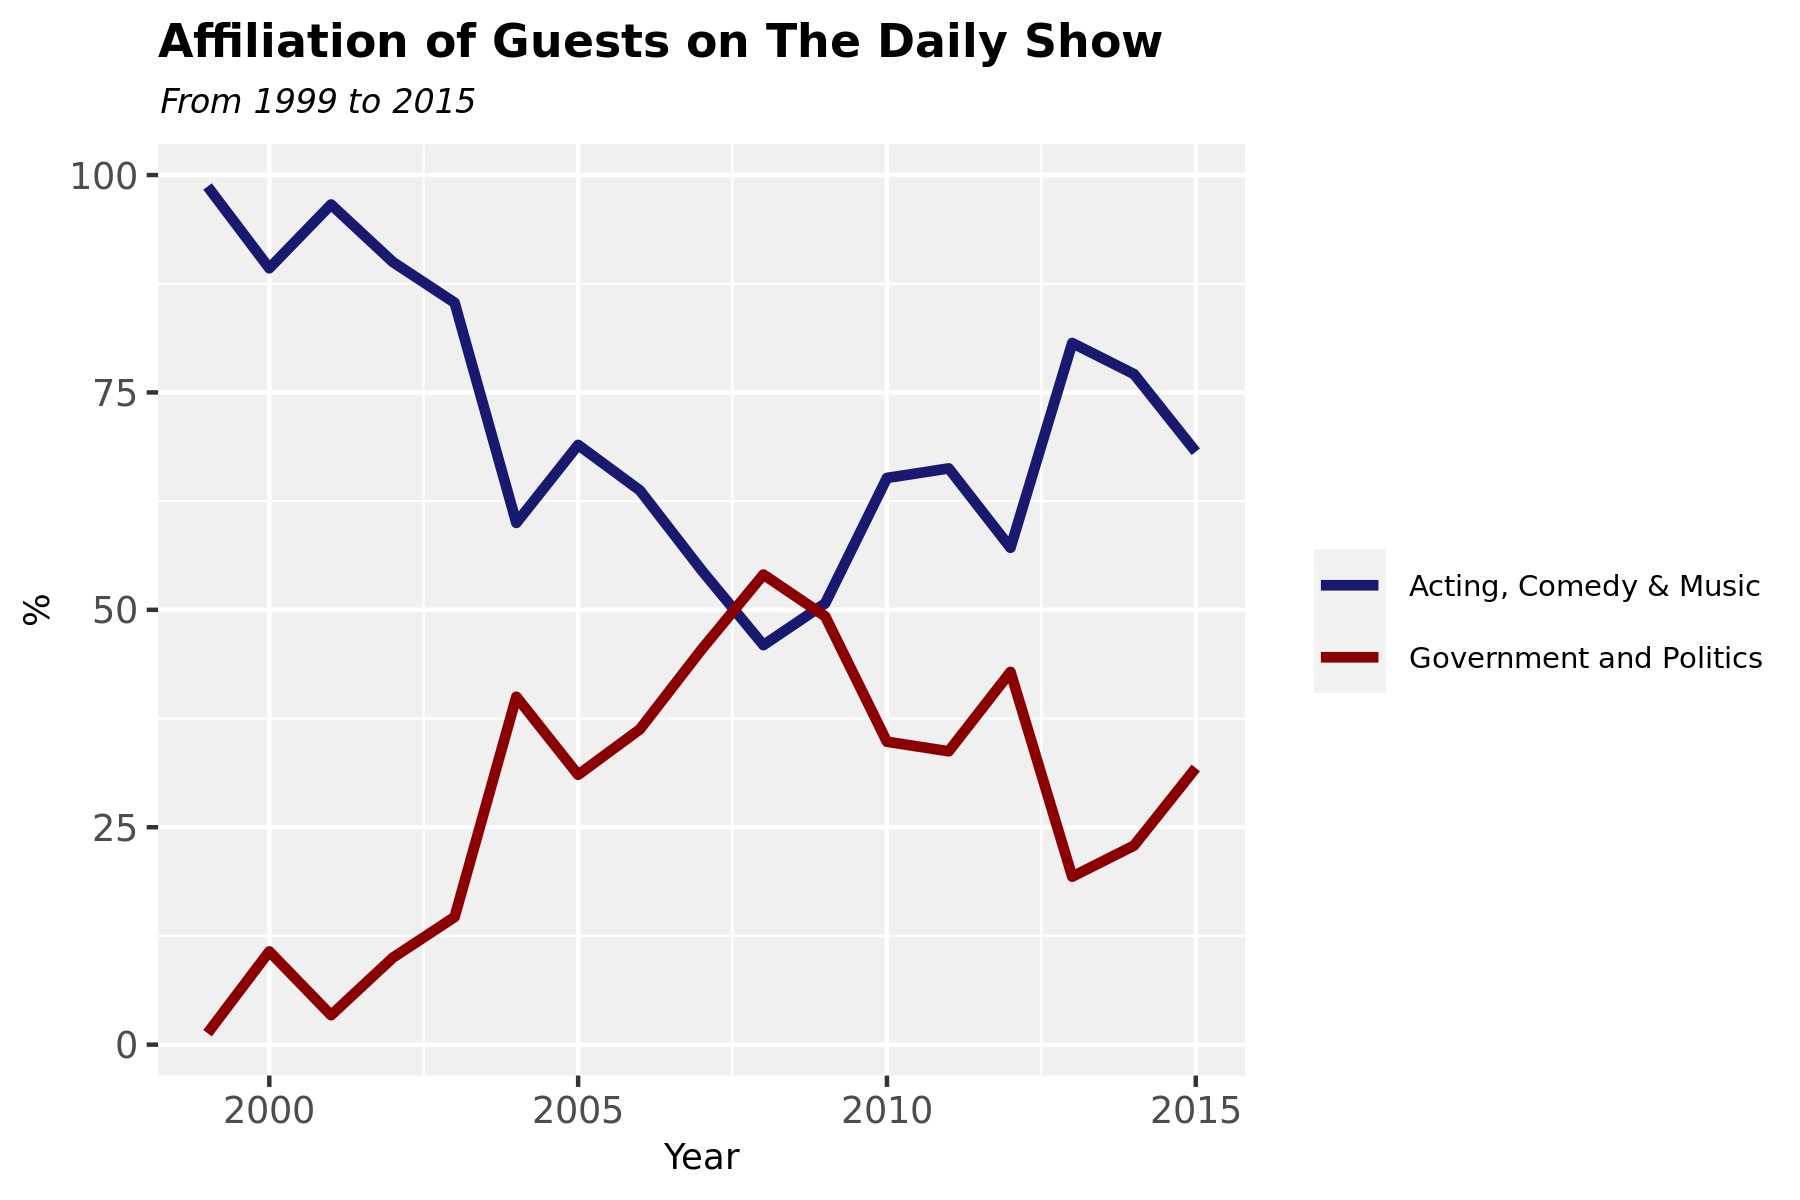

In [5]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)
p = ggplot(ds_group_new_percent, aes(x = YEAR, y = percent, color = Group_new))
p = p + scale_color_manual(values=c("midnightblue","red4"))
p = p + geom_line(size = 1.2)
p = p + labs(y = "%", x = "Year")
p = p + labs(title = "Affiliation of Guests on The Daily Show", subtitle = "From 1999 to 2015")
p = p + theme(plot.subtitle = element_text(size = 8, face = "italic", color = "black"))
p = p + theme(plot.title = element_text(color = "black", size = 11, face = "bold"))
p = p + theme(axis.title.x = element_text(color = "black", size = 8.5))
p = p + theme(axis.title.y = element_text(color = "black", size = 8.5))
p = p + theme(panel.background = element_rect(fill = "gray94"))
p = p + theme(legend.title = element_blank())
p = p + theme(legend.text=element_text(size=7))
p

**Guests from acting, comedy and music have always graced late night television to promote their films, music and other projects. Though actors, comedians and musicians still make up the majority of guests on late night TV, we are starting to see a shift in the types of people who are invited to such shows. Politicians and government officials have started to increase their TV appearances, especially on shows like The Daily Show with Jon Stewart, a winning talk/news satire program.**

**According to the graph, appearances of guests associated with government/politics started increasing exponentially just before 2005. In 2003, the United States initiated war on Iraq and the country has been involved in conflict in the Middle East ever since. The percentage of political figures on The Daily Show was highest around 2008, even overtaking the percentage of guests from the acting, comedy and music category. This could be because 2008 was a pivotal year in the United States' history. We saw the election of the first African-American president and were also in the midst of a severe economic recession.** 

**This data only goes to 2015, but it would be very interesting to see what the percentages look like today! I would expect a continued increase in the presence of political figures on The Daily Show, especially since US politics is much more polarized today.**


Let's look at the top 10 figures in both categories.. 

In [6]:
top_10 = ds_group_new %>%
filter(Group_new == "Acting, Comedy & Music") %>% 
count(Raw_Guest_List) %>%
arrange(-n) %>%
head(10)

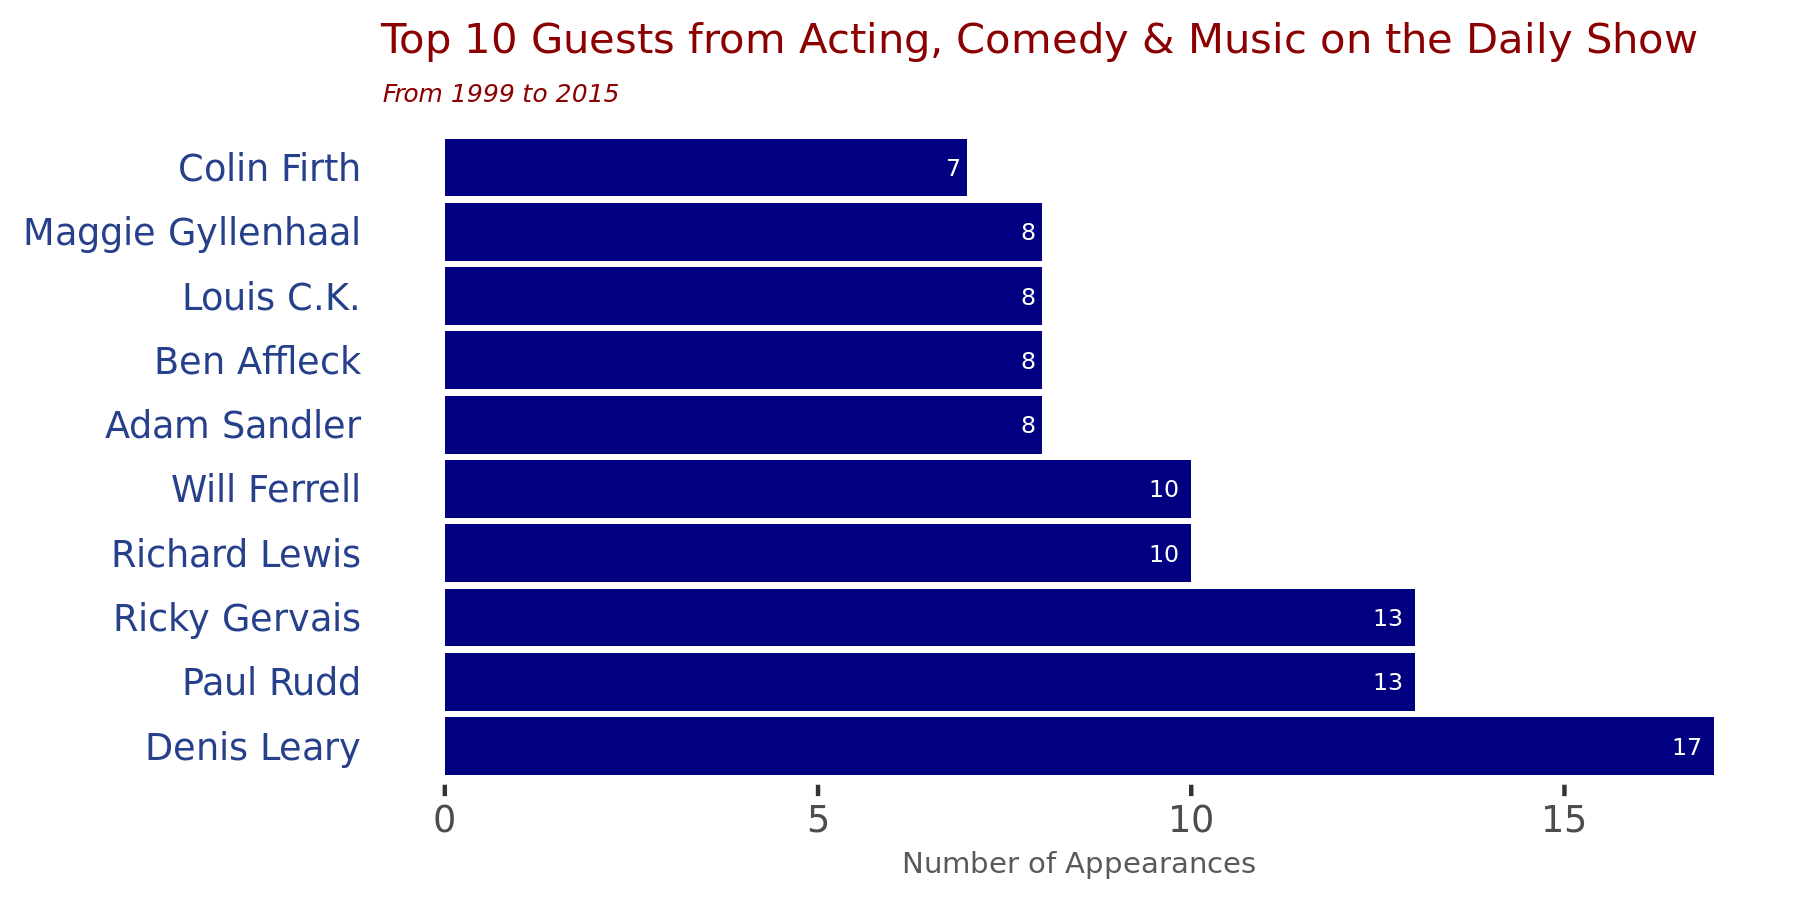

In [7]:
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 300)
p = ggplot(top_10, aes(x = Raw_Guest_List %>% fct_inorder(), y = n))
p = p + geom_col(fill = "navyblue")
p = p + coord_flip()
p = p + labs(y = "Number of Appearances")
p = p + labs(title = "Top 10 Guests from Acting, Comedy & Music on the Daily Show", subtitle = "From 1999 to 2015")
p = p + theme(plot.subtitle = element_text(size = 6, face = "italic", color = "red4"))
p = p + theme(plot.title = element_text(color = "red4", size = 10))
p = p + theme(axis.title.y = element_blank())
p = p + theme(axis.title.x = element_text(color = "gray35", size = 7))
p = p + theme(axis.text.y = element_text(color = "royalblue4"))
p = p + theme(axis.ticks.y = element_blank())
p = p + theme(panel.background = element_rect(fill = "white"))
p = p + geom_text(aes(label = n, hjust = 1.4), color = "white", size = 2)
p

In [8]:
top_10_gov = ds_group_new %>%
filter(Group_new == "Government and Politics") %>% 
count(Raw_Guest_List) %>%
arrange(-n) %>%
head(10)

top_10_gov %>% head

Raw_Guest_List,n
<chr>,<int>
Mike Huckabee,8
Bill Clinton,7
Bob Dole,7
Elizabeth Warren,6
Madeleine Albright,6
Newt Gingrich,6


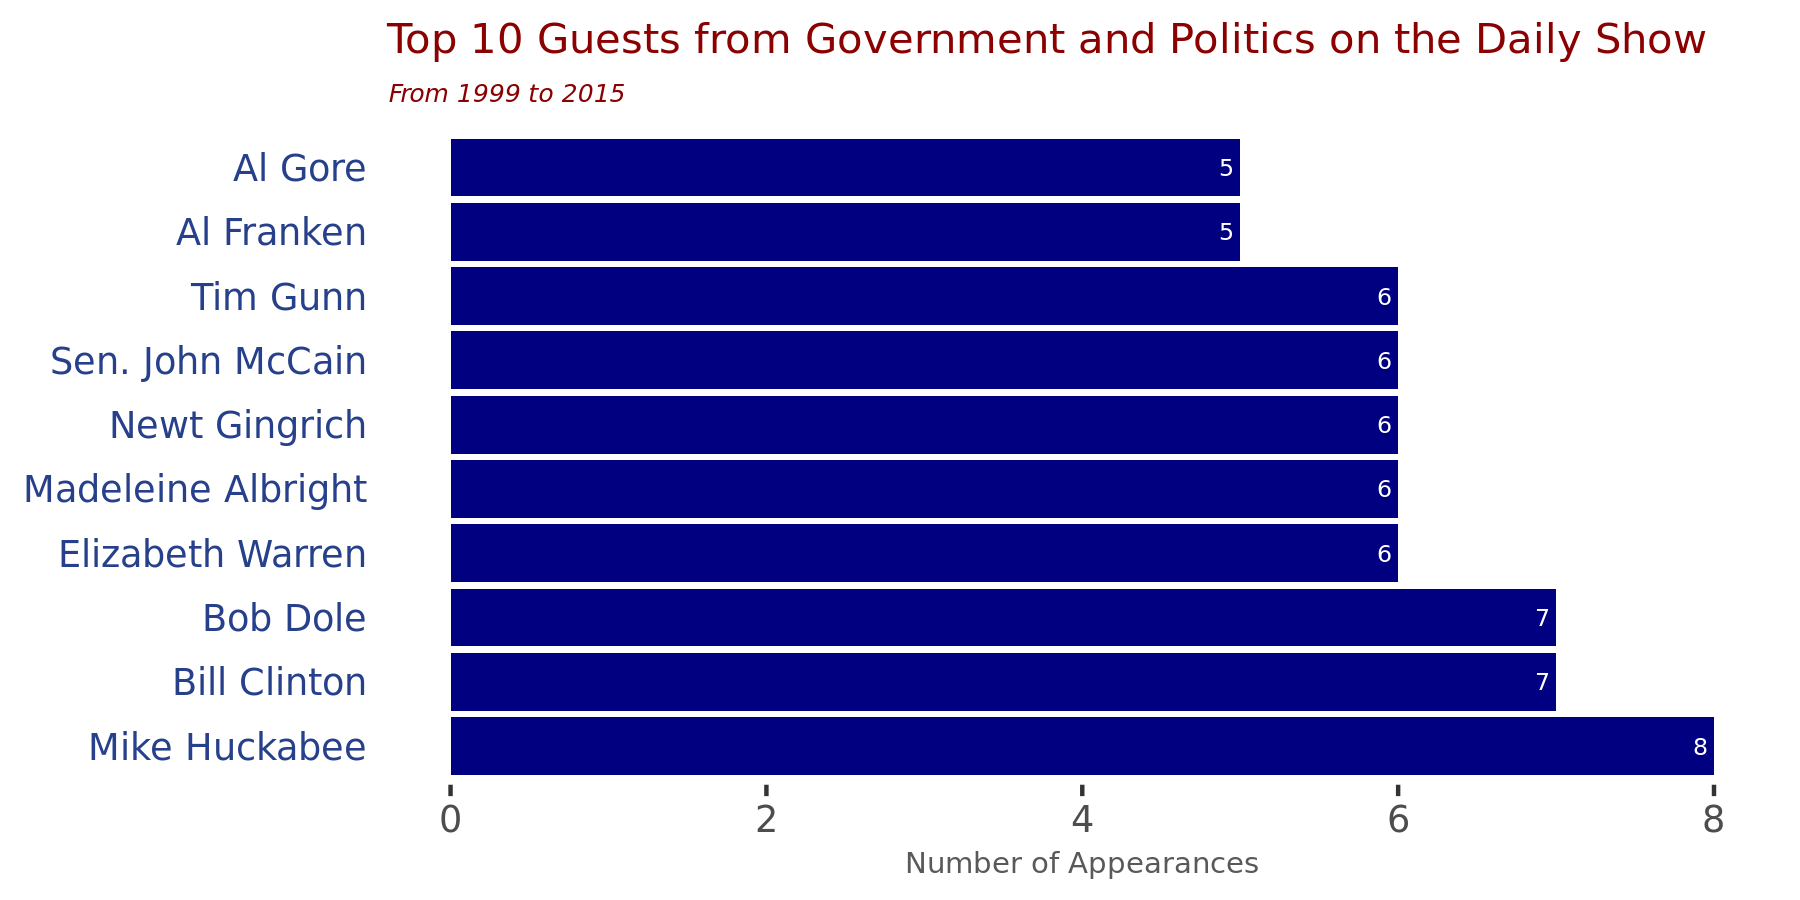

In [9]:
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 300)
p = ggplot(top_10_gov, aes(x = Raw_Guest_List %>% fct_inorder(), y = n))
p = p + geom_col(fill = "navyblue")
p = p + coord_flip()
p = p + labs(y = "Number of Appearances")
p = p + labs(title = "Top 10 Guests from Government and Politics on the Daily Show", subtitle = "From 1999 to 2015")
p = p + theme(plot.subtitle = element_text(size = 6, face = "italic", color = "red4"))
p = p + theme(plot.title = element_text(color = "red4", size = 10))
p = p + theme(axis.title.y = element_blank())
p = p + theme(axis.title.x = element_text(color = "gray35", size = 7))
p = p + theme(axis.text.y = element_text(color = "royalblue4"))
p = p + theme(axis.ticks.y = element_blank())
p = p + theme(panel.background = element_rect(fill = "white"))
p = p + geom_text(aes(label = n, hjust = 1.4), color = "white", size = 2)
p